In [104]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_process import ArmaProcess


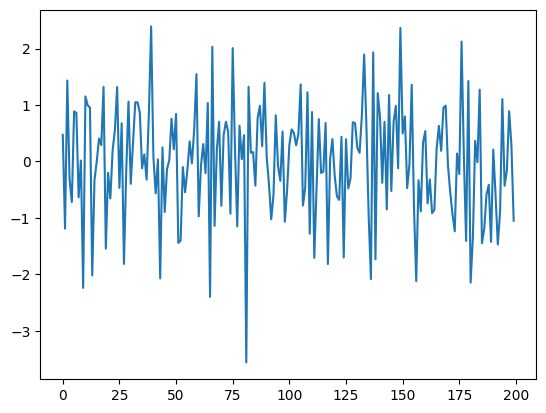

In [95]:
np.random.seed(1234)
# generate white noise for 200 observations and plot it
white_noise = np.random.normal(0, 1, 200)
plt.plot(white_noise)

In [96]:
# generate a white noise with mean 4 and sd 2 then use the arima function to estimate the parameters
white_noise = np.random.normal(4, 2, 200)
ARIMA(white_noise, order=(1, 0, 0)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -411.451
Date:                Mon, 19 Sep 2022   AIC                            828.901
Time:                        16:05:47   BIC                            838.796
Sample:                             0   HQIC                           832.905
                                - 200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2558      0.135     31.528      0.000       3.991       4.520
ar.L1          0.0015      0.071      0.021      0.983      -0.137       0.140
sigma2         3.5845      0.361      9.938      0.000       2.878       4.291
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.84
Prob(Q):                              1.00   Prob(JB):                         0.66
Heteroskedasticity (H):               1.04   Skew:                             0.16
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Explain with your own words what a random walk is (minimum 100 words).

A random walk is a time series where the next value is dependent on the previous value. A white noise is a time series where the next value is independent of the previous value. 

## Explain with your own words what stationarity means for a time series

A stationary time series is a time series where the mean, variance and autocorrelation are constant over time.

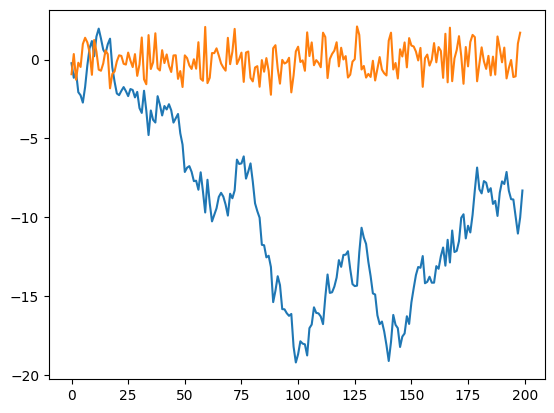

In [97]:
# Create a random walk series, plot it, calculate the first difference series and plot it
random_walk = np.cumsum(np.random.normal(0, 1, 200))
plt.plot(random_walk)
plt.plot(np.diff(random_walk))


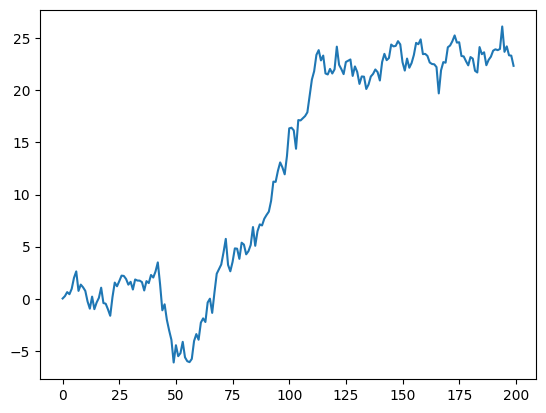

In [98]:
# Generate WN drift data, convert it to a random walk and plot it
white_noise_drift = np.cumsum(np.random.normal(0, 1, 200)) + (np.arange(200) / 10)
plt.plot(white_noise_drift)

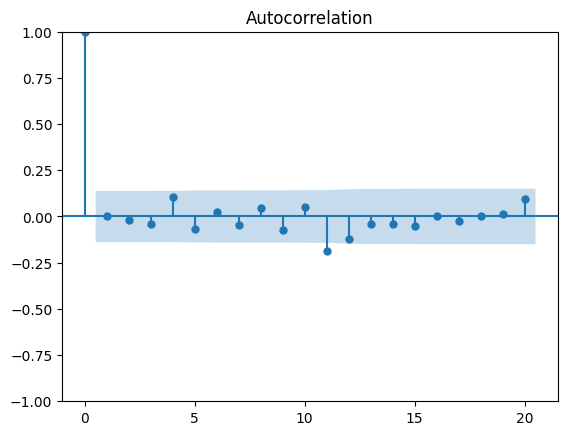

In [99]:
# Plot the ACF on the white noise.
plot_acf(white_noise, lags=20)
plt.show()

## What’s the characteristic of a white noise ACF ?

The ACF of a white noise is 0 for all lags. Moreover, they are never statistically significant.

In [100]:
# Perform a Ljung-Box Test. Command : Box.test in R, ljung is an option.
acorr_ljungbox(white_noise, lags=20)

,lb_stat,lb_pvalue
1,0.000420,0.983652
2,0.089287,0.956338
3,0.405949,0.939011
4,2.719443,0.605817
5,3.675847,0.596962
6,3.814349,0.701783
7,4.310992,0.743341
8,4.746905,0.784253
9,5.812366,0.758541
10,6.333611,0.786499


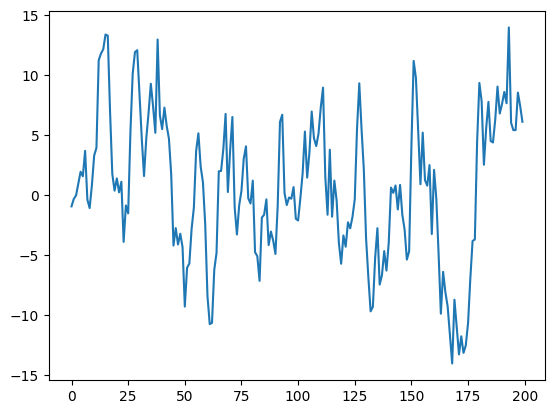

In [162]:
# Use the arima.sim function (or Python equivalent) to generate time series based on the autoregressive model, with slopes comprised between -1 and 1.
arima_sim = ArmaProcess(ar = [0.3, -0.25]).generate_sample(nsample=200)
plt.plot(arima_sim)

## What do you observe ?

The ACF of the random walk is not 0 for all lags. Moreover, they are statistically significant.


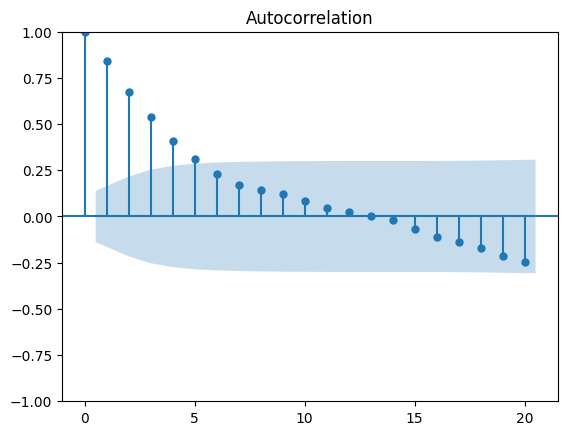

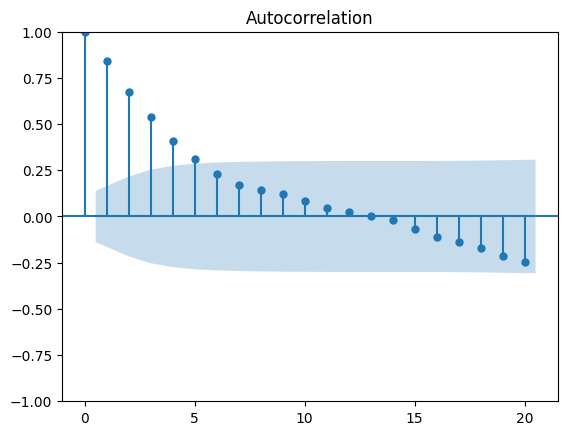

In [163]:
plot_acf(arima_sim, lags=20)